Лабораторна робота №6 Тема:Запобігання перенавчанню. L1 та L2 регуляризації.

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
#Завдання 1. Побудова регресійної моделі та запобігання перенавчанню.
# 1. Завантаження та підготовка даних:
# Виберіть вбудований датасет для задачі регресії з бібліотеки scikit-learn
# (наприклад, Boston Housing, California Housing) або будь-який датасет
# для регресії.

data = fetch_california_housing()
X, y = data.data, data.target
df = pd.DataFrame(data=X, columns=data.feature_names)
df['target'] = y

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Завантажте дані та розділіть їх на навчальну та тестову вибірки
# (рекомендується використовувати співвідношення 80/20 або 70/30)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 2. Побудова регресійної моделі:
# Побудуйте базову лінійну регресійну модель на основі навчальної вибірки
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Оцініть точність моделі на тестовій вибірці та визначте її продуктивність,
# використовуючи метрики якості регресії (наприклад, mean_squared_error,R^2).
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"MSE навчальних даних: = {train_mse:.2f}, R^2 = {train_r2:.2f}")
print(f"MSE тестових даних: = {test_mse:.2f}, R^2 = {test_r2:.2f}")

MSE навчальних даних: = 0.52, R^2 = 0.61
MSE тестових даних: = 0.56, R^2 = 0.58


In [5]:
# 4. Запобігання перенавчанню:
# Введіть регуляризацію: використайте моделі з регуляризацією, такі як Ridge Regression або Lasso Regression.
# Перевірте роботу моделі з різними значеннями параметра регуляризації та виберіть оптимальне значення
# Застосуйте крос-валідацію для більш стабільної оцінки продуктивності моделі.

alphas = np.logspace(0, 4, 100)
ridge_cv_scores = []
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    scores = cross_val_score(ridge_model, X, y, cv=5, scoring = 'neg_mean_squared_error')
    ridge_cv_scores.append(-scores.mean())

lasso_cv_scores = []
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    scores = cross_val_score(lasso_model, X, y, cv=5, scoring = 'neg_mean_squared_error')
    lasso_cv_scores.append(-scores.mean())

best_ridge_alpha = alphas[np.argmin(ridge_cv_scores)]
best_lasso_alpha = alphas[np.argmin(lasso_cv_scores)]

print(f"Ridge - найкраще значення: {best_ridge_alpha}")
print(f"Lasso - найкраще значення: {best_lasso_alpha}")

Ridge - найкраще значення: 72.20809018385468
Lasso - найкраще значення: 1.0


In [6]:
# 5. Оцінка результатів:
# Оцініть кінцеву продуктивність моделі на тестовій вибірці та порівняйте її з базовою моделлю.
# Проаналізуйте, як введення регуляризації та використання крос-валідації вплинули на якість моделі.

ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train, y_train)
ridge_y_test_pred = ridge_model.predict(X_test)

lasso_model = Lasso(alpha=best_lasso_alpha)
lasso_model.fit(X_train, y_train)
lasso_y_test_pred = lasso_model.predict(X_test)

ridge_test_mse = mean_squared_error(y_test, ridge_y_test_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_y_test_pred)
ridge_test_r2 = r2_score(y_test, ridge_y_test_pred)
lasso_test_r2 = r2_score(y_test, lasso_y_test_pred)

print(f"Ridge MSE = {ridge_test_mse:.2f}, R^2 = {ridge_test_r2:.2f}")
print(f"Lasso MSE = {lasso_test_mse:.2f}, R^2 = {lasso_test_r2:.2f}")

Ridge MSE = 0.55, R^2 = 0.58
Lasso MSE = 0.94, R^2 = 0.28


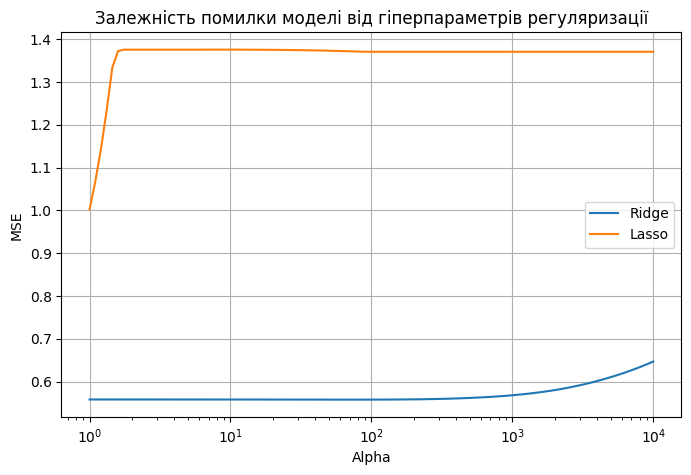

In [7]:
# 6. Візуалізація та висновки:
# Побудуйте графіки, що демонструють залежність помилки моделі від гіперпараметрів регуляризації.
# Підготуйте звіт з висновками щодо ефективності моделі, заходів щодо запобігання перенавчанню та загальних результатів.

plt.figure(figsize=(8, 5))
plt.semilogx(alphas, ridge_cv_scores, label='Ridge')
plt.semilogx(alphas, lasso_cv_scores, label='Lasso')

plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Залежність помилки моделі від гіперпараметрів регуляризації')

plt.legend()
plt.grid(True)
plt.show()

Висновок: У рамках лабораторної роботи на основі датасету California Housing було побудовано регресійну модель та застосовано методи Lasso і Ridge для запобігання перенавчанню. З отриманих результатів видно, що Lasso регуляризація є більш доцільною для цього датасету, оскільки вона ефективніше зменшує проблему надмірної складності моделі.

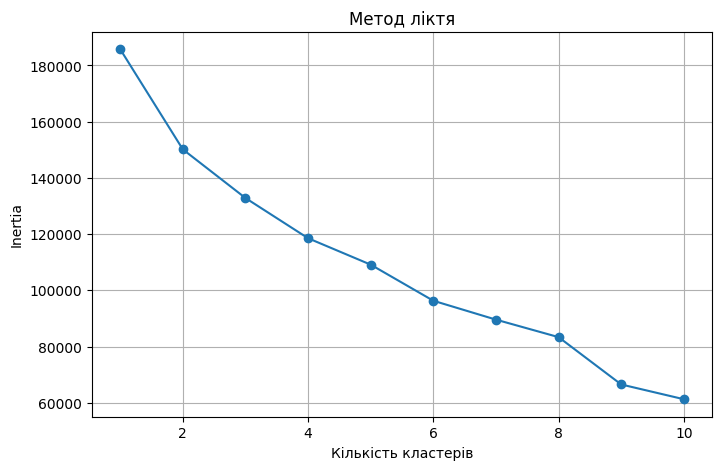

In [8]:
# Завдання 2.
# Виконати кластерізацію даних. Затосувати метод ліктя або метод силуєтів.
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

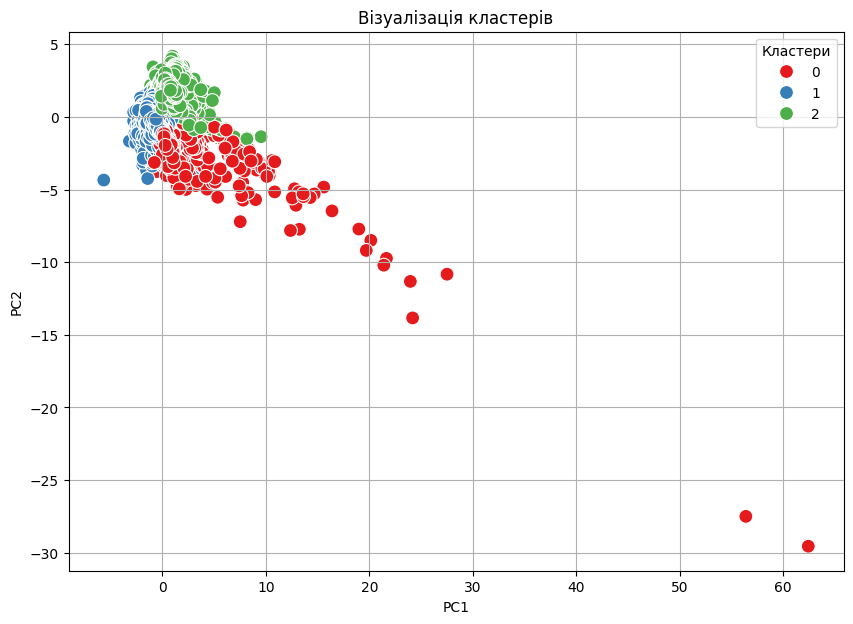

In [17]:
# Зробити візуалізацію кластерів.
from sklearn.decomposition import PCA

optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_df)

clusters = kmeans.predict(scaled_df)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)

df_pca = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100)
plt.title('Візуалізація кластерів')
plt.legend(title = 'Кластери')
plt.grid(True)
plt.show()

Висновок: У ході виконання лабораторної роботи було виконано кластеризацію даних із датасету Iris за допомогою ліктьового метода, який показав, що оптимальна кількість кластерів дорівнює трьом, що підтверджується візуальними відображеннями кластерів. Результати роботи були завантажені на відповідний Github-репозиторій.